In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree



sb.set()

data = pd.read_csv('cleaned_hotel_bookings.csv', dtype={'agent': str, 'company': str})



In [54]:
selected_categorical_cols = ['deposit_type', 'agent', 'market_segment']
encoded_categorical_df = pd.get_dummies(data[selected_categorical_cols], drop_first=True)
final_data_encoded = pd.concat([encoded_categorical_df, data[['lead_time', 'total_of_special_requests', 'is_canceled']]], axis = 1)

X = final_data_encoded.drop(columns='is_canceled')
y = final_data_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Random Forest Classifier

The Random Forest classifier is an ensemble method that builds multiple decision trees and combines their outputs to improve prediction accuracy and reduce overfitting.  
It is particularly well-suited for structured/tabular data and can effectively capture non-linear relationships between features.



To handle class imbalance, we used the `class_weight='balanced'` parameter.  
This automatically adjusts the weights of classes based on their frequencies in the training data, giving more importance to the minority class (`canceled = 1`), and improving recall without sacrificing too much accuracy.


In [56]:
from sklearn.ensemble import RandomForestClassifier

randforest = RandomForestClassifier(n_estimators=500,
    max_depth=15,
    min_samples_split=2,
    class_weight='balanced', 
    random_state=42
)
randforest.fit(X_train, y_train)

y_train_pred_rfc = randforest.predict(X_train)
y_test_pred_rfc = randforest.predict(X_test)



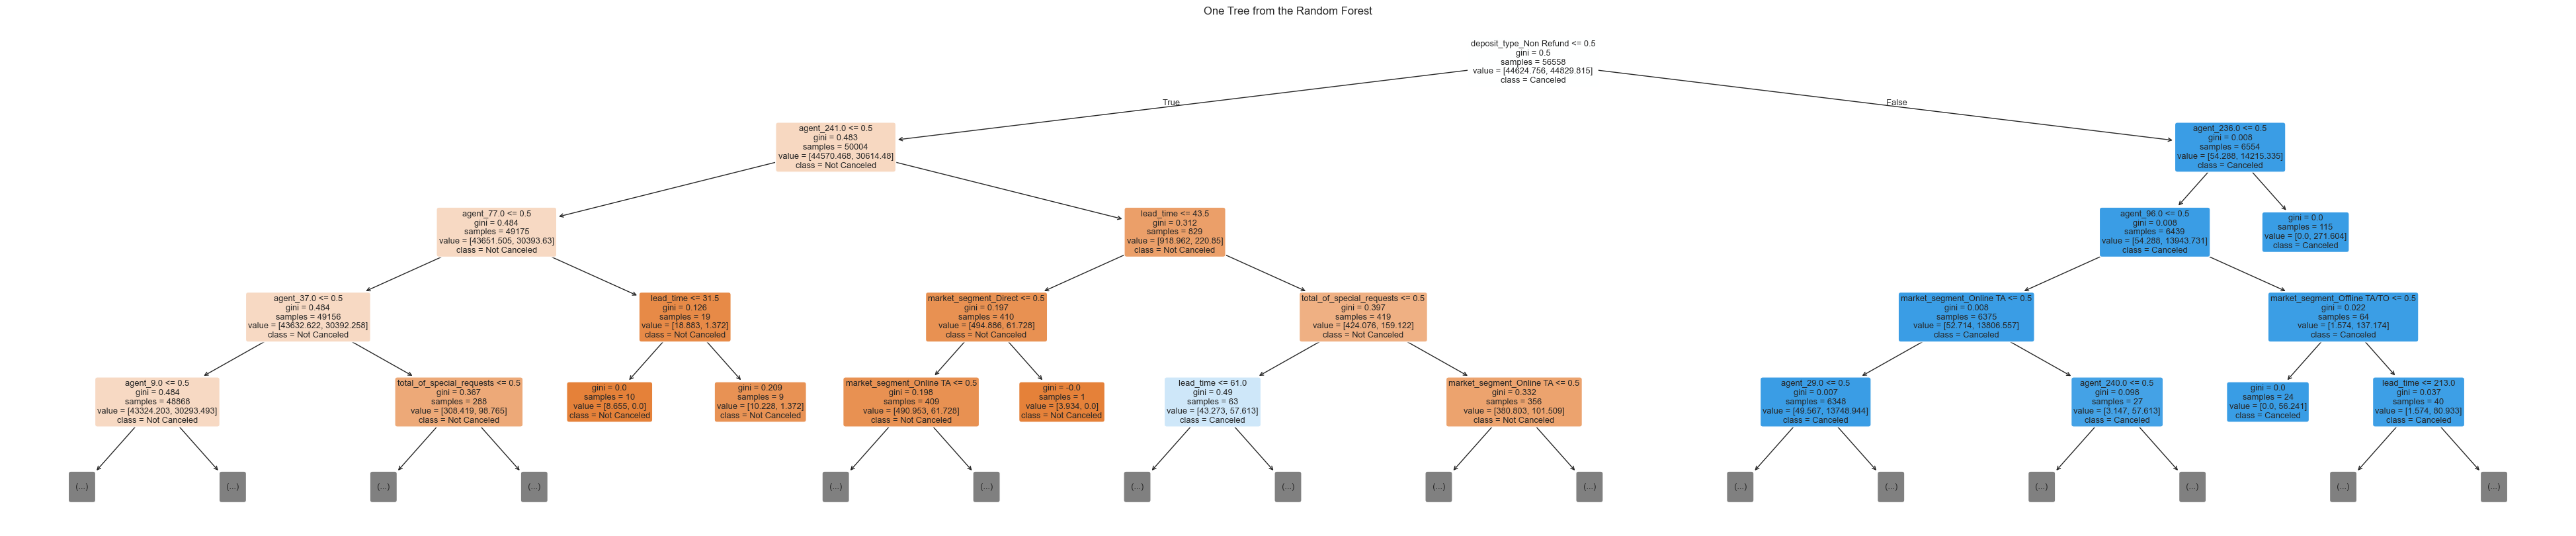

In [57]:
plt.figure(figsize=(50, 10))
plot_tree(randforest.estimators_[0], 
          filled=True, 
          rounded=True, 
          feature_names=X_train.columns, 
          class_names=['Not Canceled', 'Canceled'], 
          max_depth=4)
plt.title("One Tree from the Random Forest")
plt.show()

<Axes: >

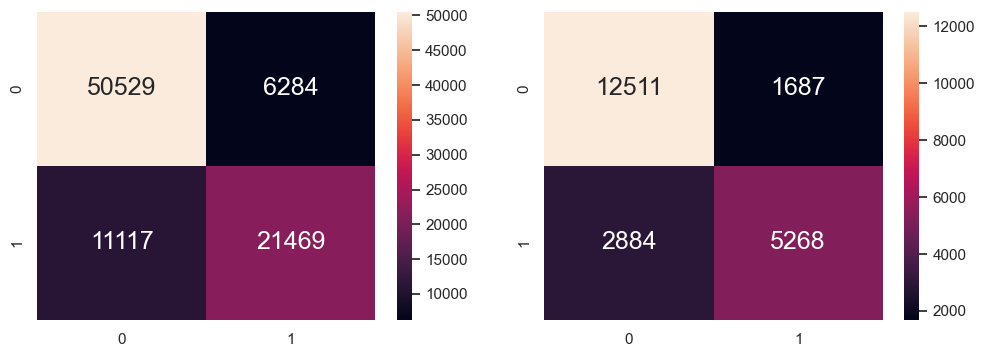

In [58]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred_rfc),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_rfc), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [59]:
randforest_accuracy = accuracy_score(y_test, y_test_pred_rfc)
randforest_report = classification_report(y_test, y_test_pred_rfc)
print(f"Accuracy Score of Random Forest Classifier : {randforest_accuracy}")
print(f"Classification Report: \n{randforest_report}")

Accuracy Score of Random Forest Classifier : 0.7954809843400448
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     14198
           1       0.76      0.65      0.70      8152

    accuracy                           0.80     22350
   macro avg       0.79      0.76      0.77     22350
weighted avg       0.79      0.80      0.79     22350



## Evaluation: Random Forest Classifier

The Random Forest classifier achieved an **accuracy of 79.4%** on the test set.

### Key Observations:
- The model shows strong performance for class `0` (not canceled) with a **precision of 0.81** and a **recall of 0.87**, meaning it correctly identifies most non-canceled bookings.
- For class `1` (canceled), the **precision is 0.75** and **recall is 0.65**, indicating it is slightly less effective at identifying cancellations.
- The **F1-score** for class `1` is **0.70**, reflecting a moderate balance between precision and recall for predicting cancellations.
- The **macro average F1-score is 0.77**, which suggests balanced performance across both classes.
- The **weighted average F1-score remains at 0.79**, consistent with the model's overall accuracy.

### Summary:
The Random Forest model slightly outperforms the Decision Tree, especially in identifying non-canceled bookings. While it struggles slightly more with recall for cancellations, its higher overall precision and robustness make it a more reliable model for this task.
